In [2]:
import pickle
data = pickle.load( open( "save.p", "rb" ) )
print('loaded with {}'.format(len(data)))

loaded with 2366


In [13]:
# find all unique addresses
unique_addresses = list(set([x['address'] for x in data]))
print(len(unique_addresses))

959


In [23]:
# make a count of each address
counts = {}
for item in data:
    address = item['address']
    if address == '':
        continue
    if address in counts:
        counts[address] += 1
    else:
        counts[address] = 1

# sort
sorted_by_value = sorted(counts.items(), key=lambda kv: kv[1], reverse=True)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

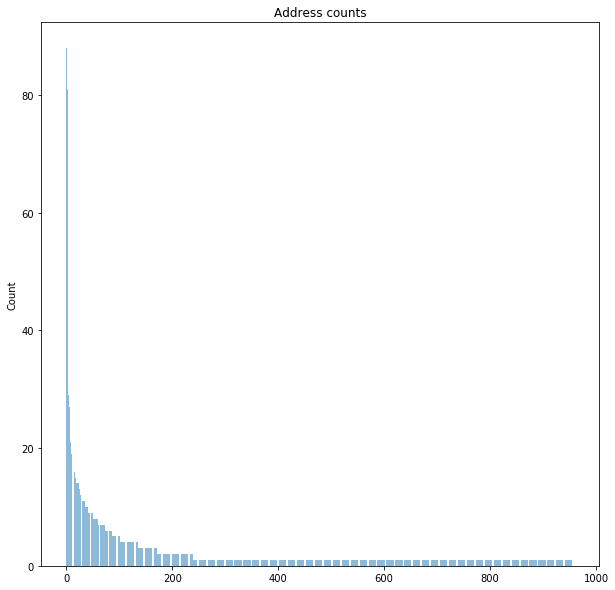

In [41]:
# plot chart
plt.rcParams['figure.figsize'] = [10, 10]

addresses = [x[0] for x in sorted_by_value]
y_pos = np.arange(len(addresses))
count = [x[1] for x in sorted_by_value]
 
plt.bar(y_pos, count, align='center', alpha=0.5)
# plt.xticks(y_pos, addresses)
plt.ylabel('Count')
plt.title('Address counts')
plt.show()

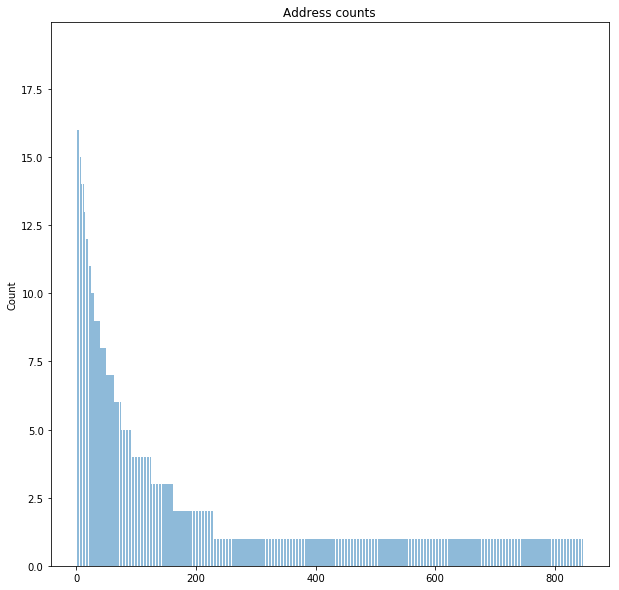

In [44]:
plt.rcParams['figure.figsize'] = [10, 10]

addresses = [x[0] for x in sorted_by_value[10:-100]]
y_pos = np.arange(len(addresses))
count = [x[1] for x in sorted_by_value[10:-100]]
 
plt.bar(y_pos, count, align='center', alpha=0.5)
# plt.xticks(y_pos, addresses)
plt.ylabel('Count')
plt.title('Address counts')
plt.show()

In [98]:
# check our systems
mac_addresses = {
    'jacky_pc': "b8:81:98:bf:5d:a1",
    'jacky_phone': "3c:28:6d:01:c3:57",
    'jesse_phone': "10:f1:f2:83:77:73",
    'rumman_phone': "d4:dc:cd:8b:dc:66",
    'micah_phone': "9a:80:23:73:e8:1c"
}

for name, addr in mac_addresses.items():
    if addr in counts:
        print('{} saw {} times'.format(name, counts[addr]))
    else:
        print('Did not see {}'.format(name))


jacky_pc saw 9 times
jacky_phone saw 5 times
jesse_phone saw 1 times
rumman_phone saw 2 times
Did not see micah_phone


In [62]:
# distances
new_data = []
for item in data:
    if item['address'] != '':
        if counts[item['address']] >= 3:
            new_data.append(item)
len(new_data)

1497

In [64]:
jacky = []
for item in data:
    if item['address'] == mac_addresses['jacky_phone']:
        jacky.append(item)
jacky

[{'timestamp': 1547963097.324249,
  'address': '3c:28:6d:01:c3:57',
  'channel': 6,
  'power': -62.0},
 {'timestamp': 1547963178.475829,
  'address': '3c:28:6d:01:c3:57',
  'channel': 6,
  'power': -47.0},
 {'timestamp': 1547963226.27195,
  'address': '3c:28:6d:01:c3:57',
  'channel': 6,
  'power': -41.375},
 {'timestamp': 1547963238.66141,
  'address': '3c:28:6d:01:c3:57',
  'channel': 6,
  'power': -26.25},
 {'timestamp': 1547963347.496429,
  'address': '3c:28:6d:01:c3:57',
  'channel': 6,
  'power': -59.25}]

address: 38:de:ad:9e:52:b4


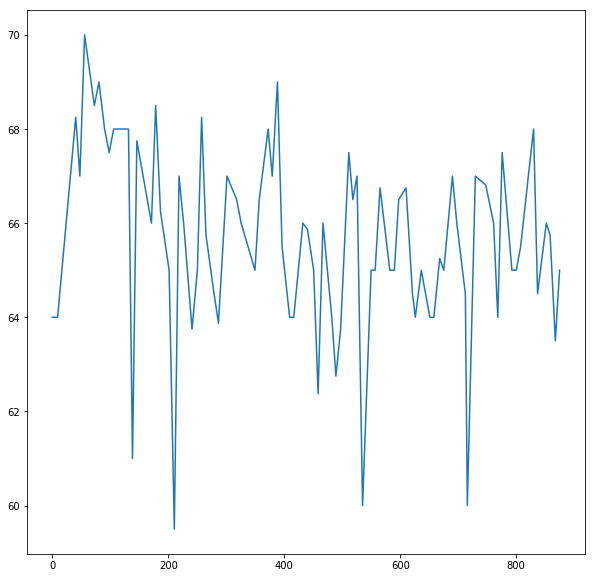

In [77]:
largest = []
i = 1
print('address: {}'.format(sorted_by_value[i][0]))
for item in data:
    if item['address'] == sorted_by_value[i][0]:
        largest.append(item)

time_stamps = [x['timestamp'] for x in largest]
small = time_stamps[0]
time_stamps = [x - small  for x in time_stamps]
power = [abs(x['power']) for x in largest]
plt.plot(time_stamps, power)

In [96]:
# gain bubble
gain_60 = []

for item in data:
    if abs(item['power']) <= 60:
        gain_60.append(item)
print(len(gain_60))
unique_addresses_60 = list(set([x['address'] for x in gain_60]))
print(len(unique_addresses_60))

571
205


In [97]:
# make a count of each address
counts_60 = {}
for item in gain_60:
    address = item['address']
    if address == '':
        continue
    if address in counts_60:
        counts_60[address] += 1
    else:
        counts_60[address] = 1

# sort
sorted_by_value = sorted(counts_60.items(), key=lambda kv: kv[1], reverse=True)
sorted_by_value

[('94:65:2d:db:9c:c5', 44),
 ('a4:b8:05:bb:14:66', 25),
 ('7c:5c:f8:e2:71:fb', 16),
 ('9c:30:5b:4a:57:51', 15),
 ('a4:db:30:9a:21:df', 15),
 ('90:32:4b:2c:5d:5b', 13),
 ('e4:70:b8:f7:52:a6', 12),
 ('ac:37:43:4a:dd:d8', 11),
 ('30:10:b3:30:74:88', 11),
 ('00:56:cd:a3:d7:fc', 11),
 ('5c:cf:7f:d5:d8:da', 10),
 ('88:b1:11:32:19:fa', 9),
 ('b8:81:98:bf:5d:a1', 9),
 ('58:c5:cb:8e:b9:99', 9),
 ('ac:37:43:4b:8b:01', 8),
 ('b8:53:ac:92:ee:a2', 8),
 ('60:c5:47:8c:b1:04', 8),
 ('f8:63:3f:81:fb:82', 8),
 ('b0:35:9f:42:da:ab', 7),
 ('a0:99:9b:12:b2:d5', 6),
 ('7c:67:a2:68:0e:2f', 6),
 ('c4:17:fe:42:29:b0', 5),
 ('f8:28:19:d8:df:17', 5),
 ('c4:b3:01:b9:10:c7', 5),
 ('dc:44:b6:11:c0:62', 5),
 ('f4:b7:e2:03:12:cb', 5),
 ('f0:18:98:55:88:ad', 4),
 ('64:a2:f9:25:4f:b8', 4),
 ('d0:13:fd:39:ef:45', 4),
 ('6e:ee:a0:9e:97:59', 4),
 ('b4:f7:a1:bd:07:5c', 4),
 ('dc:53:60:57:15:5c', 4),
 ('64:a2:f9:ed:62:c7', 4),
 ('a8:66:7f:0c:05:6a', 4),
 ('14:10:9f:e5:09:7f', 4),
 ('34:02:86:51:0e:46', 4),
 ('b4:69:21:c2:21